# NumPy revision


## NumPy array Indexing and slicing

In [2]:
import numpy as np

# indexing and slicing
a = np.arange(10)
print("a = \t\t", a) # a = [0, 1, 2, 3, 4, ..]
print("a[2] = \t\t", a[2]) # single element access (Python is zero-indexed)
print("a[2:5] = \t", a[2:5]) # multiple element access
print("a[3:] = \t", a[3:]) # equivalent to a[3:10]
print("a[0:8:2] = \t", a[0:8:2]) # access with steps
print("a[5:0:-1] = \t", a[5:0:-1]) # reverse order

# 2-d arrays
b = np.arange(8).reshape((2,4))
print("\n b = \n", b , '\n')
print("b[0,3] = \t", b[0,3])
print("b[:,1] = \t", b[:,1]) # second column of b
print("b[-1,:] = \t", b[-1,:]) # last row of b
print("\n b[0:2,1:3] = \n", b[0:2,1:3]) # specific rows and cols of b

a = 		 [0 1 2 3 4 5 6 7 8 9]
a[2] = 		 2
a[2:5] = 	 [2 3 4]
a[3:] = 	 [3 4 5 6 7 8 9]
a[0:8:2] = 	 [0 2 4 6]
a[5:0:-1] = 	 [5 4 3 2 1]

 b = 
 [[0 1 2 3]
 [4 5 6 7]] 

b[0,3] = 	 3
b[:,1] = 	 [1 5]
b[-1,:] = 	 [4 5 6 7]

 b[0:2,1:3] = 
 [[1 2]
 [5 6]]


## NumPy Array Iterating

In [3]:
# iterating 1-d arrays
a = np.arange(3)

print("\na:",a)

print("\na*10:")
for i in a:
    print(i*10)

print('\na*10:')
[print(i*10) for i in a]

print('\na*10:\n',a*10)

# similarly
print("\nwith modification:")
for i in range(a.shape[0]):
    a[i] = a[i]*10
    print(a[i])


# 2-d arrays
b = np.arange(6).reshape((2,3))
print("\n\n\nb:\n",b)

print("\nrows of b:")
for row in b:
    print(row)

print("\nnested loops to access all elements in b:")
for row in b:
    for elem in row:
        print(elem)

print("\nflattened array:")
for element in b.flat:
    print(element)

print("\ndirectly access a particular element:", b[1,2])


a: [0 1 2]

a*10:
0
10
20

a*10:
0
10
20

a*10:
 [ 0 10 20]

with modification:
0
10
20



b:
 [[0 1 2]
 [3 4 5]]

rows of b:
[0 1 2]
[3 4 5]

nested loops to access all elements in b:
0
1
2
3
4
5

flattened array:
0
1
2
3
4
5

directly access a particular element: 5


## NumPy Stacking

In [4]:
# stacking arrays
a = 10 * np.random.random((2,2))
print("a = \n", a)

b = np.floor(10*np.random.random((2,2)))
print("\nb = \n", b)

# vertical stack
print("\nnp.vstack((a,b)) = \n", np.vstack((a,b)))

# horizontal stack
print("\nnp.hstack((a,b)) = \n", np.hstack((a,b)))

# stacking vectors to 2-d arrays
c = np.array([50, 100])
print("\nc = \n", c)
print("\nnp.column_stack((a,c)) = \n", np.column_stack((a,c)))

a = 
 [[1.08687153 4.98481893]
 [5.84054778 8.06475586]]

b = 
 [[0. 6.]
 [4. 4.]]

np.vstack((a,b)) = 
 [[1.08687153 4.98481893]
 [5.84054778 8.06475586]
 [0.         6.        ]
 [4.         4.        ]]

np.hstack((a,b)) = 
 [[1.08687153 4.98481893 0.         6.        ]
 [5.84054778 8.06475586 4.         4.        ]]

c = 
 [ 50 100]

np.column_stack((a,c)) = 
 [[  1.08687153   4.98481893  50.        ]
 [  5.84054778   8.06475586 100.        ]]


#Pixel Manipulation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image2 Elapsed time: 4.5906 seconds
Image3 Elapsed time: 0.0009 seconds


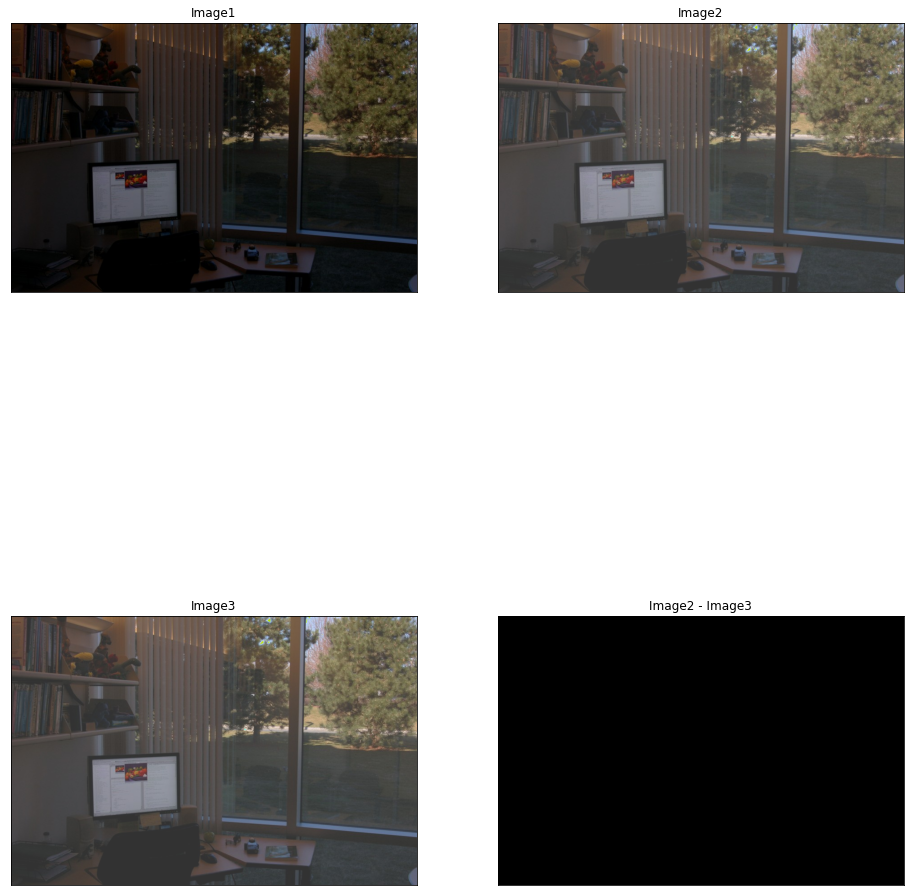

In [13]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/My Drive/ECSE_415_F_2021/Tutorial_2/images/'

# load image
image_path = path+"office_2.jpg" # use your own image path
img = cv2.imread(image_path)
img2 = img.copy() # deep copy of the image
height, width, depth = img.shape # reading image size

t0 = time.time() # for performance measurement
for row in range(0, height):
    for col in range(0, width):
        for ch in range(0, depth):
            img2[row,col,ch] += 50 # brighten image
print("Image2 Elapsed time: {:.4f} seconds".format(time.time() - t0)) # there are a lot faster ways to do this

# same operation without for (loop using numpy)
t0 = time.time()
img3 = img.copy()
img3 += 50
print("Image3 Elapsed time: {:.4f} seconds".format(time.time() - t0))

# CAUTION: always check the image reading format for different libraries before using them
# opencv reads image in BGR format while matplotlib displays it in RGB format
# convert from BGR to RGB for displaying

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,20))
plt.subplot(221), plt.imshow(img) # 2x2 subplot, 1 selected
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img2) # 2x2 subplot, 2 selected
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img3) # 2x2 subplot, 3 selected
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img2-img3) # 2x2 subplot, 4 selected
plt.title("Image2 - Image3"), plt.xticks([]), plt.yticks([])
plt.show()

# Creating a Filter, Edge Detection

### Import resources and display image

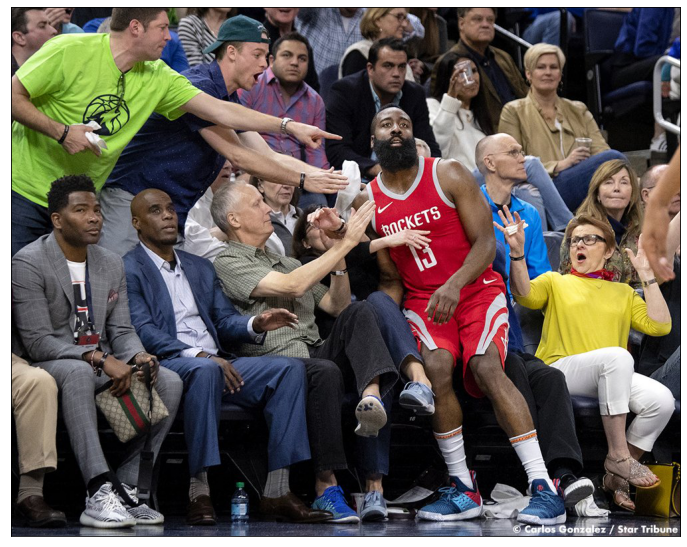

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline


# Read in the image
image = mpimg.imread(path+'basketball.jpeg')

plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

### Convert the image to grayscale

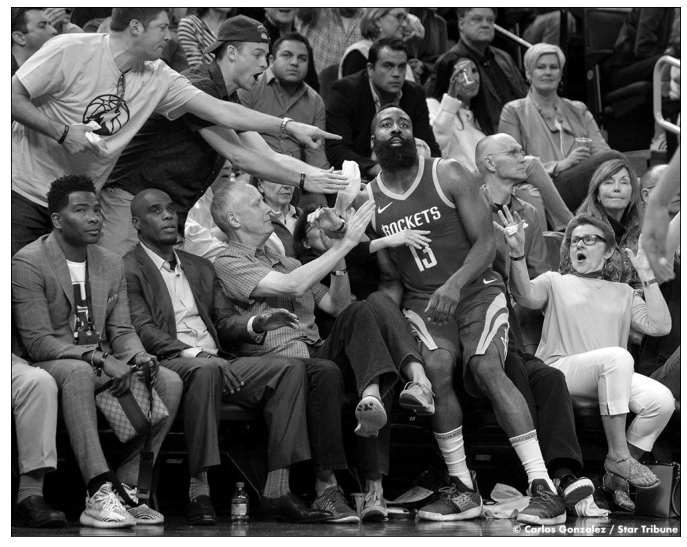

In [7]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12,16))
plt.imshow(gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### Custom Kernel


### OpenCV Filter2D

dst	=	cv.filter2D(	src, 
                        ddepth, 
                        kernel[, 
                        dst[, 
                        anchor[, 
                        delta[, 
                        borderType]]]]	)




*   src --	input image.
*   dst	-- output image of the same size and the same number of channels as src.
*   ddepth --	desired depth of the destination image, see combinations
*   kernel --	convolution kernel (or rather a correlation kernel), a  single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
*   anchor --	anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
*   delta --	optional value added to the filtered pixels before storing them in dst.
*   borderType -- pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported. (https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5) -- Different types of boarders. Ex. Constant, Reflection, Replicate, Wraping, etc. 

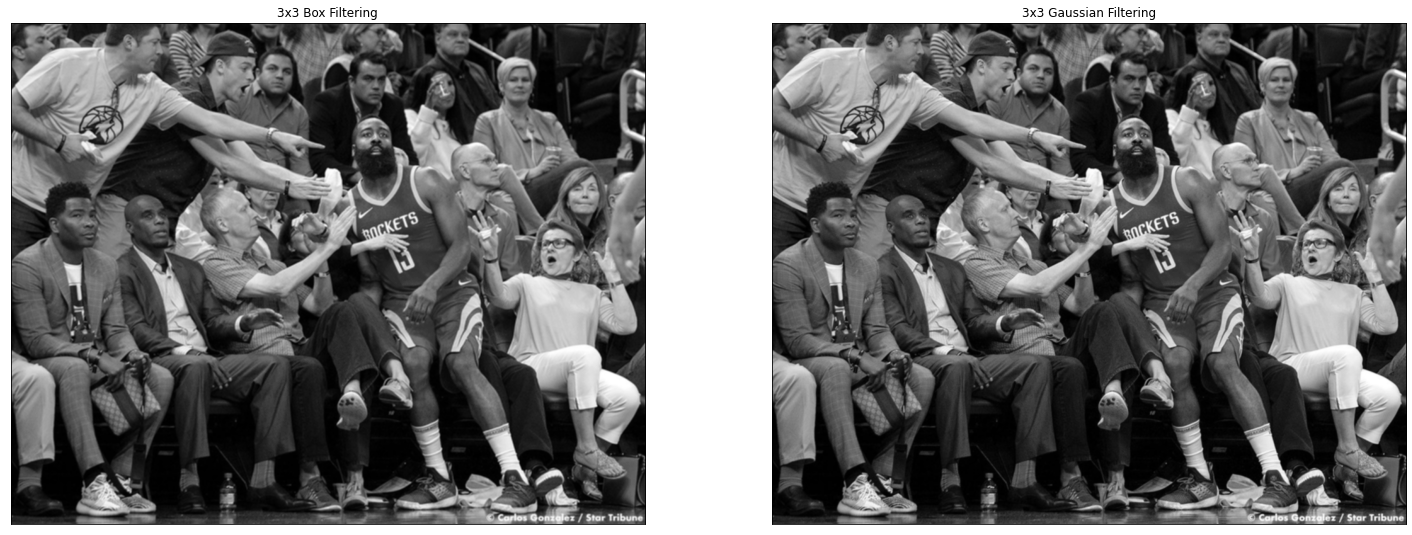

In [8]:
# Create a custom kernel

# 3x3 array for box filtering
kernel_box = np.array([[ 1, 1, 1], 
                   [ 1, 1, 1], 
                   [ 1, 1, 1]])/(9)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_box = cv2.filter2D(gray, cv2.CV_16S, kernel_box)

# 3x3 array for Gaussain Smoothing
kernel_gauss = np.array([[ 1, 2, 1], 
                   [ 2, 4, 2], 
                   [ 1, 2, 1]])/(16)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_gauss = cv2.filter2D(gray, cv2.CV_16S, kernel_gauss)

# plot
plt.figure(figsize=(25,25))
plt.subplot(121), plt.imshow(filtered_image_box, cmap='gray')
plt.title("3x3 Box Filtering"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image_gauss, cmap='gray')
plt.title("3x3 Gaussian Filtering"), plt.xticks([]), plt.yticks([])
plt.show()

### OpenCV for Filtering

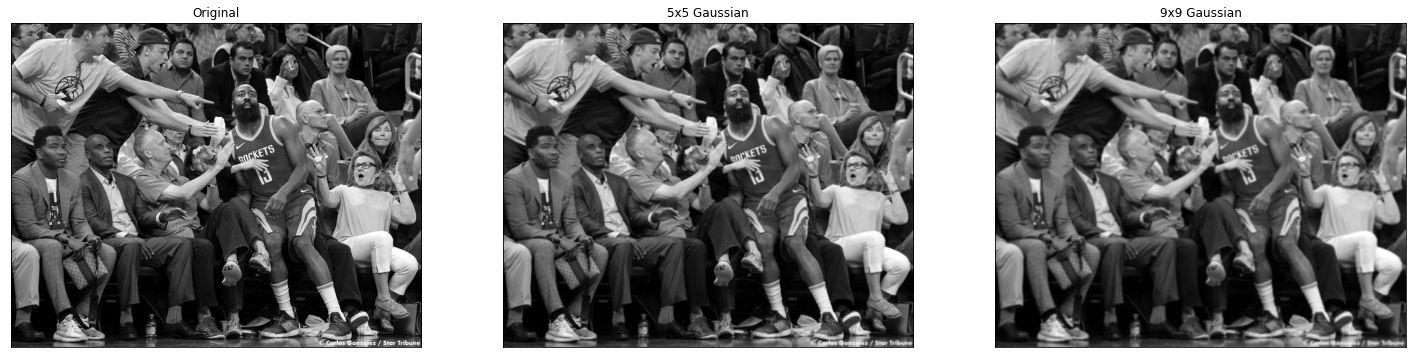

In [9]:
# Using openCV for filtering

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(gray, (5,5), 0)

# filter image using 9x9 Gaussian, the std is calculated automatically
res2 = cv2.GaussianBlur(gray, (9,9), 0)

# plot
plt.figure(figsize=(25,25))
plt.subplot(131), plt.imshow(gray, cmap='gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(res1, cmap='gray')
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(res2, cmap='gray')
plt.title("9x9 Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()



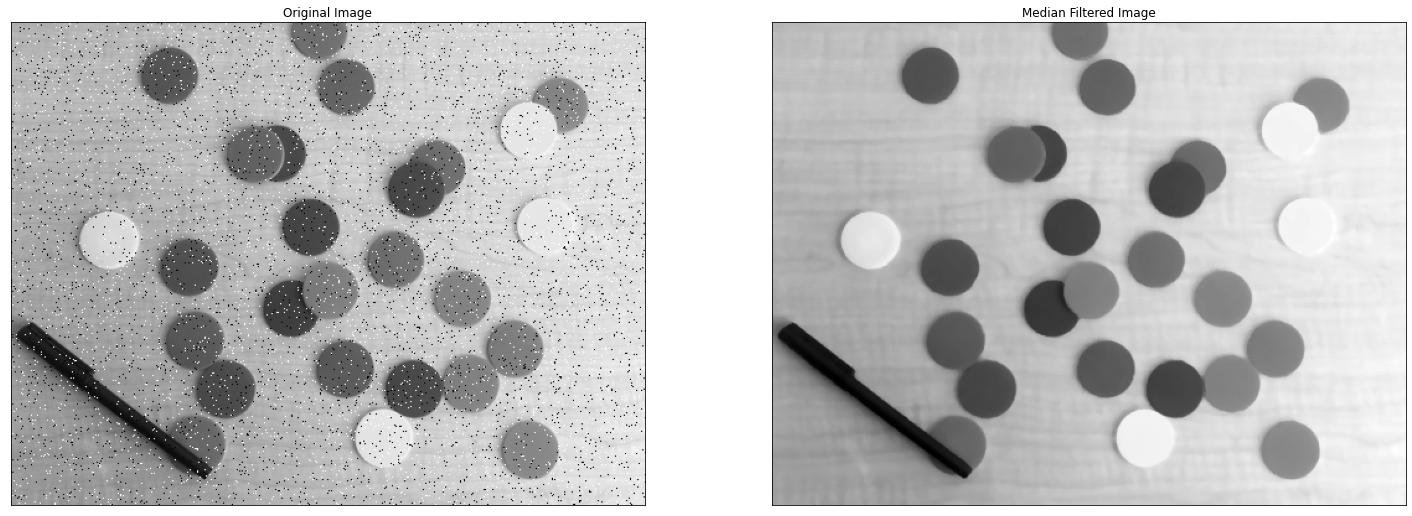

In [10]:
# Median Filtering for Salt and Pepper Noise

image_circle = mpimg.imread(path+'Circles_sp.png')

gray_circle = cv2.cvtColor(image_circle, cv2.COLOR_RGB2GRAY)

res_circle = cv2.medianBlur(gray_circle, 5)

# plot
plt.figure(figsize=(25,25))
plt.subplot(121), plt.imshow(gray_circle, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res_circle, cmap='gray')
plt.title("Median Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()


## **Implementing median filter in NumPy**


1.   We will implement Median Filter in NumPy
2.   Median Filter is a non-linear filter
3.   Recall that we need to traverse through the whole image pixel by pixel
4.   Similar to Convolution Filter, we need to handle boundary condition. We can handle it in any different ways similar to convolution, i.e., constant/zero padding, reflective padding, replicate padding, wrapping, etc. 




In [11]:
def median_filter(input_image, kernel_size):
    # calculate pad_size
    # in case of 3x3 kernel_size, we want to pad each side with 1 new pixel
    pad_size = np.floor(kernel_size/2).astype("uint8")

    # pad image. Here we are using constant padding with constant=0, basically zero_padding
    pad_input_image = np.pad(input_image, pad_width=int(pad_size), mode='constant', constant_values=0)

    # Get Height and Width of the original image.
    h, w = pad_input_image.shape # (392,514)

    # initialize output image to be similar to original image size
    output_image = np.zeros_like(input_image)

    # Now Traverse through image using two for loops
    for i in range(0, h - 2*pad_size): # 0, 390 because when we are at 390, we take values between 390-392
        for j in range(0, w - 2*pad_size): # 0, 512
            output_image[i,j] = np.median(pad_input_image[i:i+kernel_size, j:j+kernel_size])

    # return output
    return output_image


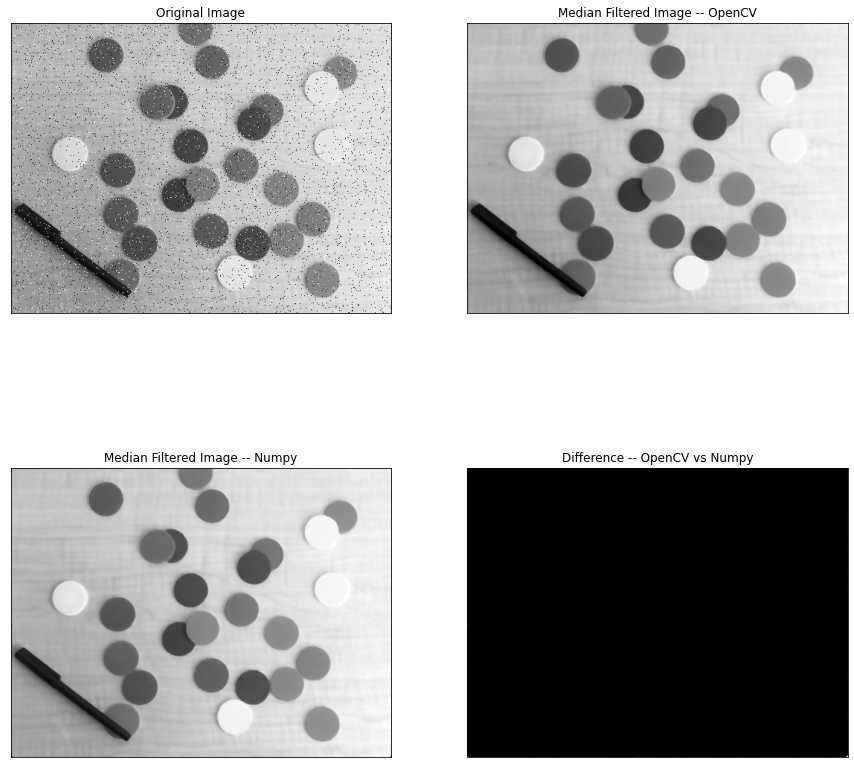

In [12]:
# get filter size, i.e. 3x3 5x5
filter_size = 5

# get median filter output

filtered_gray_circle = median_filter(gray_circle, filter_size)

# calculate difference between numpy and opencv implementation
diff_image = res_circle - filtered_gray_circle

# plot
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(gray_circle, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(res_circle, cmap='gray')
plt.title("Median Filtered Image -- OpenCV"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(filtered_gray_circle, cmap='gray')
plt.title("Median Filtered Image -- Numpy"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(diff_image, cmap='gray')
plt.title("Difference -- OpenCV vs Numpy"), plt.xticks([]), plt.yticks([])
plt.show()
